Cropping the MTSD and sorting into the proper classes.

In [21]:
from PIL import Image
import json
import glob
import os

def get_pil_box(bbox):
    return (bbox["xmin"], bbox["ymin"], bbox["xmax"], bbox["ymax"])

# Edit these two variable to control the input and output directories
mtsd_root = "/Users/.../mtsd_fully_annotated" # Path to root of original files
out_root = "/Users/.../APS360-Project/dataset" # Directory to output to (will be created if it doesnt exist)

json_root = os.path.join(mtsd_root, "annotations/")

missing_file_count = 0
total_file_count = 0
for imagefile in glob.glob(os.path.join(mtsd_root, "images/*.jpg")):
    total_file_count += 1
    # Only print every 100 lines
    if total_file_count % 100 == 0:
        print(total_file_count)
    
    name, _ = os.path.splitext(os.path.basename(imagefile))
    img = Image.open(imagefile)

    try:
        with open(os.path.join(json_root, name + ".json")) as jsonfile:
            annotations = json.load(jsonfile)

        for obj in annotations["objects"]:
            key = obj["key"]
            label = obj["label"]
            crop = img.crop(get_pil_box(obj["bbox"]))
            
            out_dir = os.path.join(out_root, label)
            os.makedirs(out_dir, exist_ok=True)
            crop.save(os.path.join(out_dir, key + ".jpg"))
    except FileNotFoundError:
        # print("Warning: %s skipped because .json may not exist" % imagefile)
        missing_file_count += 1
    except Exception as e:
        print("Error: %s" % e)

print("Number of files without .jsons {} which is {}%".format(missing_file_count, missing_file_count/total_file_count))

Error: tile cannot extend outside image
Number of files without .jsons 8 which is 0.1509433962264151%


Highest count class is: regulatory--yield--g1 with 2775 items
Lowest count class is: regulatory--shared-path-bicycles-and-pedestrians--g1 with 20 items


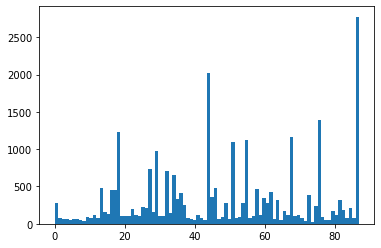

In [4]:
# plot histogram of all classes in cropped dataset
import matplotlib.pyplot as plt
import os, os.path

dataset_folder = 'C:\\jeremy\\Assignments\\APS360\\Project\\unique_dataset\\regulatory'
reg_classes = os.listdir(dataset_folder)
items = []
highest = None
highest_count = 0
lowest = None
lowest_count = 1e10
for i,class_dir in enumerate(reg_classes):
    fl = dataset_folder+'\\'+class_dir
    if len(os.listdir(fl)) > highest_count:
        highest = class_dir
        highest_count = len(os.listdir(fl))
    if len(os.listdir(fl)) < lowest_count:
        lowest = class_dir
        lowest_count = len(os.listdir(fl))
    for fi in os.listdir(fl):
        items.append(i)     
plt.hist(items,bins=len(reg_classes))
print("Highest count class is: {} with {} items".format(highest,highest_count))
print("Lowest count class is: {} with {} items".format(lowest,lowest_count))

In [5]:
# check all the classes count
for i,class_dir in enumerate(reg_classes):
    fl = dataset_folder+'\\'+class_dir
    print("Class name: {} with {} items".format(class_dir,len(os.listdir(fl))))

Class name: regulatory--bicycles-only--g1 with 282 items
Class name: regulatory--buses-only--g1 with 76 items
Class name: regulatory--do-not-block-intersection--g1 with 58 items
Class name: regulatory--dual-lanes-go-straight-on-left--g1 with 64 items
Class name: regulatory--dual-lanes-go-straight-on-right--g1 with 50 items
Class name: regulatory--dual-path-bicycles-and-pedestrians--g1 with 60 items
Class name: regulatory--end-of-bicycles-only--g1 with 58 items
Class name: regulatory--end-of-maximum-speed-limit-70--g1 with 57 items
Class name: regulatory--end-of-no-parking--g1 with 37 items
Class name: regulatory--end-of-priority-road--g1 with 92 items
Class name: regulatory--end-of-prohibition--g1 with 82 items
Class name: regulatory--end-of-speed-limit-zone--g1 with 117 items
Class name: regulatory--give-way-to-oncoming-traffic--g1 with 76 items
Class name: regulatory--go-straight--g1 with 485 items
Class name: regulatory--go-straight-or-turn-left--g1 with 153 items
Class name: regula

In [ ]:
# data augmentation

import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

# pick a random degree of rotation between 25% on the left and 25% on the right
def random_rotation(image_array: ndarray):
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

# add random noise to the image
def random_noise(image_array: ndarray):
    return sk.util.random_noise(image_array)



In [ ]:
# locally split cropped dataset
pip install split_folders

In [ ]:
import split_folders
input_folder = 'C:\\jeremy\\Assignments\\APS360\\Project\\unique_dataset\\regulatory'
output_folder = 'C:\\jeremy\\Assignments\\APS360\\Project\\split_unique_datasets'
split_folders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.70, .15, .15))

In [ ]:
# Split uncropped dataset on google colab
!pip install gdown

In [ ]:
# Access denied, will have to do it locally
!gdown --id 1Fjn2RV8BBRZhtiwJA9Wdg-3BMt9Z_pyJ --output regulatory.zip

In [2]:
# Check num of dataset
import os, os.path
base_dir = 'C:\\jeremy\\Assignments\\APS360\\Project\\Regulatory\\'
print("Annotation files: {}".format(len(os.listdir(base_dir+'annotations'))))
print("image files: {}".format(len(os.listdir(base_dir+'images'))))
print(os.listdir(base_dir+'annotations')[0])
print(os.listdir(base_dir+'images')[0])

Annotation files: 18027
image files: 18027
--7fWq6WjZM8L1eUSuvOEA.json
--7fWq6WjZM8L1eUSuvOEA.jpg


In [5]:
# split uncropped images
import os
from glob import glob
import shutil
from sklearn.model_selection import train_test_split

# find all image file names
image_files = glob(base_dir+'images\\*.jpg')
image_names = [name.replace(".jpg","").split('\\')[-1] for name in image_files]

# split names into 70% train, 15% val and 15% test
train_names, test_names = train_test_split(image_names, test_size=0.3,random_state=1)
val_names, test_names = train_test_split(test_names, test_size=0.5,random_state=1)
print(f'Train: {len(train_names)}, Val: {len(val_names)}, Test: {len(test_names)}')

Train: 12618, Val: 2704, Test: 2705


In [6]:
# split the files
def move_files(file_names, source_path, destination_path):
    # create dir if not exist
    if not os.path.exists(destination_path):
        os.makedirs(destination_path)
    if not os.path.exists(destination_path+'images'):
        os.makedirs(destination_path+'images')
    if not os.path.exists(destination_path+'annotations'):
        os.makedirs(destination_path+'annotations')
    
    # move images with given name
    for fi in file_names:
         image = fi+'.jpg'
         json = fi+'.json'
         
         shutil.move(os.path.join(source_path+'images', image), 
                     os.path.join(destination_path+'images', image))
         shutil.move(os.path.join(source_path+'annotations', json),
                     os.path.join(destination_path+'annotations', json))
    return

source_path = base_dir
destination_path = 'C:\\jeremy\\Assignments\\APS360\\Project\\split_regulatory_dataset\\'
move_files(train_names,source_path,(destination_path+'train\\'))
move_files(val_names,source_path,(destination_path+'val\\'))
move_files(test_names,source_path,(destination_path+'test\\'))

In [7]:
print("Train files: {}".format(len(os.listdir(destination_path+'train/images'))))
print("Val files: {}".format(len(os.listdir(destination_path+'val/images'))))
print("Test files: {}".format(len(os.listdir(destination_path+'test/images'))))

Train files: 12618
Val files: 2704
Test files: 2705


In [ ]:
# Create a zip if using Colab
!zip -r '/root/split_uncropped_dataset' -v '/root'